**Daniel Flores Rodríguez - A01734184**

Módulo 5 Evaluación de un modelo y su aplicación para predicción

In [ ]:
# Se instala los paquetes y librerias necesarias para poder realizar el analizis de la situacion problema, utilizamos matplotlib para poder graficar
# y visualisar nuestros dacumentos 
!pip install matplotlib
# se usa pandas para el manejo y vizualizacion de datos de matrices
!pip install pandas
#usada para poder leer los dataframes
!pip install pandas_datareader

#importamos librerias
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np




#importamos nuestro archivo csv
from google.colab import drive
drive.mount("/content/gdrive")
%cd "/content/gdrive/MyDrive/ITESM/Septimo Semestre/DeepLearning/Bloque2"
%ls

In [75]:
# importamos archivo csv de nombres de las firmas que contienen las firmas, con informacion relevante de cada una de estas.
#calculamos columnas de dataframe
col = pd.read_csv('Indicadores20221007105052.csv').columns
data = pd.read_csv('Indicadores20221007105052.csv',names = col)

#limpiamos el df
data.drop(index=data.index[0], axis = 0, inplace = True)
data # se imprime el dataset, para ver si es el correcto

,Indicador,Nombre Indicador,Clave área geográfica,Entidad,Municipio,Periodo,Valor,Excepción,Unidad de medida,Frecuencia,Information Status,Referencias
1,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/07,111.2745518,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
2,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/06,112.7975011,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
3,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/05,114.4424238,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
4,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/04,109.5298659,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
5,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/03,111.9401523,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
...,...,...,...,...,...,...,...,...,...,...,...,...
351,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/05,63.61289973,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
352,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/04,61.86598396,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
353,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/03,63.94324936,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
354,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/02,61.02252106,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1


In [76]:
#se transforma el periodos a un tipo de fecha de tal manera que podamos leer facilmente esta y tambien manipularla.
data['Periodo'] = pd.to_datetime(data['Periodo'], infer_datetime_format = True)
data['Periodo']

1     2022-07-01
2     2022-06-01
3     2022-05-01
4     2022-04-01
5     2022-03-01
         ...    
351   1993-05-01
352   1993-04-01
353   1993-03-01
354   1993-02-01
355   1993-01-01
Name: Periodo, Length: 355, dtype: datetime64[ns]

In [77]:
#convertimos a flotante y nos aseguramos de que podamos acceder y manipular estas variables.
data['Valor'] = data['Valor'].astype(float)
data['Valor']

1      111.274552
2      112.797501
3      114.442424
4      109.529866
5      111.940152
          ...    
351     63.612900
352     61.865984
353     63.943249
354     61.022521
355     60.407691
Name: Valor, Length: 355, dtype: float64

Procedemos a realizar transformaciones de variable de valor para poder realizar un mejor manejo de la información y asegurarnos que los valores sean numeros con los que podamos trabajar, asi mismo se realiza un cambio de la variable de Periodo, para poder manejar fechas en formato YYYY-MM--DD y así poder trabajar con plots y graficas de manera mas intuitiva y fácil, asi mismo, se aprovecha para crear el data set que vamos a usar para realziar nuestras predicciones, se calculan dos variables nuevas, el valor en log y un cambioAnual del log mencionado anteriormente, esto lo podemos lograr a traves de diff(12).

In [78]:
df_indicadores = data[['Periodo', 'Valor']]
df_indicadores['Valor (log)'] = np.log(df_indicadores['Valor'])
df_indicadores['CambioAnual'] = np.log(df_indicadores['Valor']).diff(12)
df_indicadores = df_indicadores.dropna()

#se imprime el df nuevo
df_indicadores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Periodo,Valor,Valor (log),CambioAnual
13,2021-07-01,109.877851,4.699369,-0.012631
14,2021-06-01,111.171275,4.711072,-0.014522
15,2021-05-01,112.064049,4.719071,-0.021001
16,2021-04-01,108.070442,4.682783,-0.013414
17,2021-03-01,111.531140,4.714304,-0.003661
...,...,...,...,...
351,1993-05-01,63.612900,4.152816,-0.049767
352,1993-04-01,61.865984,4.124970,-0.063042
353,1993-03-01,63.943249,4.157996,-0.028476
354,1993-02-01,61.022521,4.111243,-0.027647


Tras haber realizado una pequeña limpieza de datos y extracción de aquellos datos quenos interesan para este analisis, procedo a realziar las pruebas que se solicitan, y así poder decidir la tranformacion de la variable.

# **1- Realizar pruebas estadísticas de estacionariedad y decide el tipo de transformación de la variable**

Debido a que necesitaremos que lso valores de la variable esten acomodados de forma ascendente, tendremos que cambiar dicho orden

In [79]:
#asignamos como index del dataframe las fechas de la variable periodo
df_indicadores.set_index(['Periodo'], inplace=True)
df_indicadores = df_indicadores.sort_index(axis = 0, ascending = True)

In [80]:
#imprimimos el valor del nuevo dataset.

df_indicadores

,Valor,Valor (log),CambioAnual
Periodo,,,
1993-01-01,60.407691,4.101116,-0.042483
1993-02-01,61.022521,4.111243,-0.027647
1993-03-01,63.943249,4.157996,-0.028476
1993-04-01,61.865984,4.124970,-0.063042
1993-05-01,63.612900,4.152816,-0.049767
...,...,...,...
2021-03-01,111.531140,4.714304,-0.003661
2021-04-01,108.070442,4.682783,-0.013414
2021-05-01,112.064049,4.719071,-0.021001


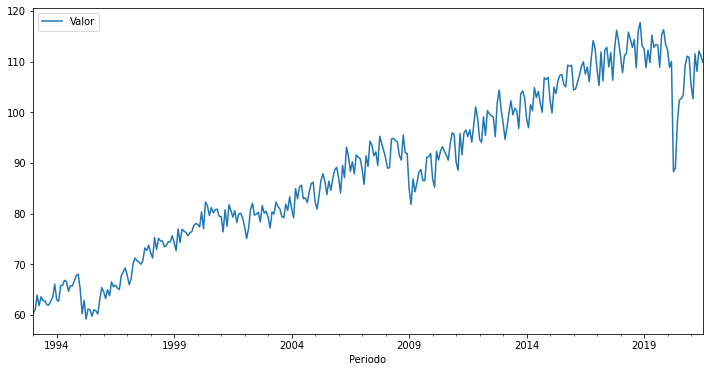

In [81]:
#realizamos una nueva visualizacion de los cambios.

plt_indicadores = df_indicadores.plot(y='Valor',figsize=(12,6), use_index=True)

**Prueba: Argumented Dickey-Fuller test**

Usamos la prueba de Dickey-fuller

In [82]:
from statsmodels.tsa.stattools import adfuller
#perform augmented Dickey-Fuller test
resultadoValor = adfuller(df_indicadores['Valor'])
resultadoValorLog = adfuller(df_indicadores['Valor (log)'])
resultadoCambioAnual = adfuller(df_indicadores['CambioAnual'])

In [83]:
print(resultadoValor)
print("------------------------------------------")

print("valor p value",resultadoValor[1])

print("------------------------------------------")
print("valor log p value",resultadoValorLog[1])

print("------------------------------------------")

print("cambioAnual p value",resultadoCambioAnual[1])


(-0.9848125452680847, 0.7587631947471516, 17, 325, {'1%': -3.450632157720528, '5%': -2.870474482366864, '10%': -2.5715301325443787}, 1474.4757562385298)
------------------------------------------
valor p value 0.7587631947471516
------------------------------------------
valor log p value 0.6486278087525352
------------------------------------------
cambioAnual p value 0.0032602635598127376


Observamos que la mayoria de los p values 

Analisis del resultado de prueba dickey-fuller:

El resultado arrojado es el p-value, siendo este mismo el que nos interesa, ya que como sabemos el p-value nos dice que es el nivel más bajo (de insignificancia) en el que el valor observado de la estadística de prueba es significativo. 

El valor P es el nivel de significancia más pequeño que conduce al rechazo de la hipótesis nula. En este caso particular podemos observar que las variables de valor normales y logaritmicas rondan entre .75 y .64 en el p-value se puede decir que estas son estacionarias.

Tambien podemos notar algi curioso y es que cuando realizamos esta prueba al cambio anual, este nos da un resultado menos a 0.05, queriendo decir que los datos ya son estacionarios y podemos decir que en este caso d = 0 y D = 0.


Es por el resultado obtenido en el test, que se procederá a realizar una transofmración de la variable Value a su valor logaritmico:

In [84]:
#aqui, solo estamos obteniendo el valor logaritmico de cada valor de la variable 'Valor' anualmente.
df_indicadores_lg = pd.Series(np.log(df_indicadores['Valor'])).diff(12).dropna()

#se procede a realizar una transformacion para tener el dataframe.
df_indicadores_lg = df_indicadores_lg.to_frame(name='CambioAnual')

#mostramos el nuevo dataset sin valores NaN y habiendo aplicado log
df_indicadores_lg

,CambioAnual
Periodo,
1994-01-01,0.042483
1994-02-01,0.027647
1994-03-01,0.028476
1994-04-01,0.063042
1994-05-01,0.049767
...,...
2021-03-01,0.013491
2021-04-01,0.202340
2021-05-01,0.230376


Posteriormente se procede a realizar la primera diferencial de normal de la variable en cuestión, la cual podremos probar nuevamente con el test de Dickey-Fuller que ahora ya es estasionaria.

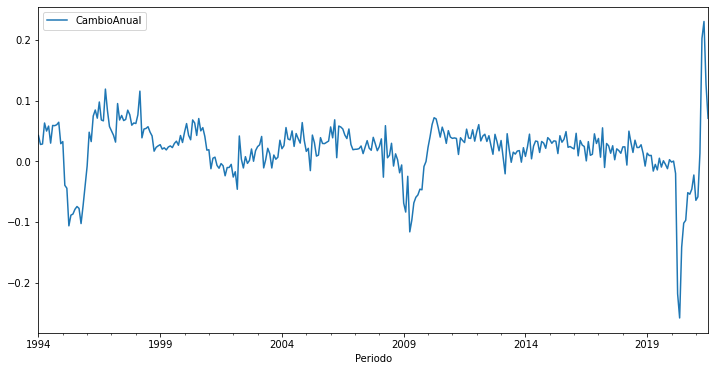

In [85]:
#asignamos a una nueva variable nueva llamada transformada, para poder continuar
df_indicadores_transformed = df_indicadores_lg

#ploteamos el nuevo df con la primera diferencial de normal aplicada en la variable.
df_indicadores_transformed.plot(figsize=(12,6))

In [86]:
#realizamos el test de Deckey-Fuller para saber si la variable/serie es estacionaria

adfuller(df_indicadores_transformed)

(-3.882606658770676,
 0.0021666475209608364,
 17,
 313,
 {'1%': -3.4514162625887037,
  '5%': -2.8708187088091406,
  '10%': -2.5717136883095675},
 -1415.6033243967963)

In [87]:
0.0021666475209608364 < 0.05

True

Podemos observar que el valor de esta variable transformada es estacionaria, pues su p-value obtenido del test de Dickey-Fuller es 0.0021666475209608364, lo que significa que es menor a 0.05

# **2-Calibra un modelo ARIMA-SARIMA basado en pruebas y gráficos de autocorrelaciones . Explica claramente el proceso de calibración y la razón de cómo va modificando los parámetros.**

**Función de autocorrelación (ACF)**

In [88]:
import statsmodels.graphics.tsaplots as tsap


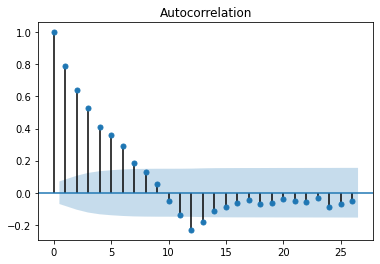

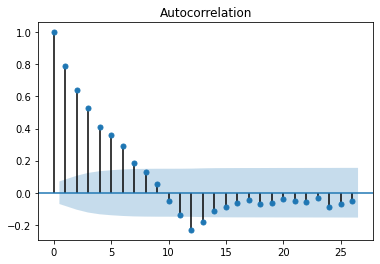

In [89]:
#invocamos los metodos para realizar las graficas correspondientes
tsap.plot_acf(df_indicadores_transformed['CambioAnual'], alpha=0.2)


De la misma manera, como se mencionaba anteriormente; no podemos esperar solamente confiar en nuestra intuición visual a traves de los graficos anteriores, por lo tanto se procede a realizar las matrices con valores equivalentes a las gráficas anteriores.

In [90]:
from statsmodels.graphics.tsaplots import acf
print(acf(df_indicadores_transformed['CambioAnual']))

[ 1.          0.79061892  0.64114022  0.53030202  0.41084407  0.35768824
  0.29051774  0.18719939  0.12757232  0.05642828 -0.05084364 -0.13671505
 -0.23181452 -0.17964853 -0.11633854 -0.08942951 -0.06296688 -0.04616263
 -0.06781954 -0.06605477 -0.03659385 -0.05125356 -0.05486616 -0.03356539
 -0.08976478 -0.0728125  -0.05145019 -0.08006368 -0.08775091 -0.08132793
 -0.0891497  -0.07765409 -0.07349404 -0.08715206 -0.08072658 -0.08791374
 -0.05188469 -0.05795542 -0.06341186 -0.05547507 -0.0284231 ]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


**Función parcial de autocorrelación (PACF)**

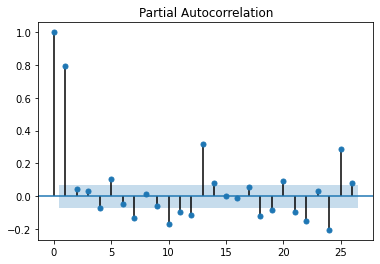

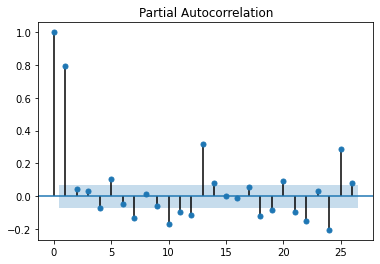

In [91]:
tsap.plot_pacf(df_indicadores_transformed['CambioAnual'], alpha=0.2)

In [92]:
from statsmodels.graphics.tsaplots import pacf
print(pacf(df_indicadores_transformed['CambioAnual']))

[ 1.          0.79301474  0.0435574   0.03068632 -0.07223257  0.10309725
 -0.04705999 -0.13107623  0.01257155 -0.0626116  -0.1703683  -0.09969328
 -0.1177721   0.31807894  0.08015063 -0.00111248 -0.00859631  0.05764105
 -0.12123295 -0.0855194   0.0914867  -0.09836359 -0.15213864  0.03181221
 -0.20631082  0.29025021  0.08190459 -0.06710528 -0.05368493  0.07971213
 -0.09068334 -0.08966775  0.08328454 -0.08394205 -0.15914255  0.03085769
  0.02126862  0.05246051  0.12646265 -0.04725043  0.02968509]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1029: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


**Analizis de resultados:**

Para empezar, debemos recordar que el ACF nos muestra las correlaciones AC entre la serie con la que trabajamos y sus errores, mientras que el PACF nos indica las autocorrelaciones parciales de la serie con la que trabajamos y, de igual manera, sus errores.

Analizemos la primera grafica de autocorrelación. En esta podemos observar como las primeras 6 lineas verticales, sobresalen de manera notable de la zona azul y la linea horizontal azul, la cual como sabemos, es el intervalo de 95% de confianza para las autocorrelaciones, por lo tanto, si la linea vertical cruza la linea punteada azul, esto querrá decir que la autocorrelación especifica es significativamente diferente de cero. En una interpretación un poco más significativa de la primera grafica de ACF, podemos decir entonces que las primeras 6 o 7 lineas verticales son positivas y significativas, con un comportamiento descendente.

Para el caso de la segunda grafica tambien conocida como PACF, podemos ver autocorrelaciones especificas, que llegan a medir el cuanto más esta corrlacionada la serie con la que estamos trabajando y sus repectivos LAG, despues de haber considerado el efecto de las autocorrelaciones de los LAG de orden inferior.

En la grafica obtenida de PACF, podemos ver como apenas 1 autocorrelación parcial tiene in valor significativo.

Tras haber analizado esto, podemos decir que el la calibracion del modelo podemos dejarlo con p = 1 y q = 1.

#**Estimación de modelos SARIMA**

Modelo SARIMA

In [93]:
import statsmodels.tsa.arima.model as tsa_arima
import statsmodels.api as sm

In [94]:
sarima_model = sm.tsa.statespace.SARIMAX(df_indicadores['Valor (log)'], order = (1,0,1), seasonal_order = (0,1,1,12), simple_differencing = True).fit()


print(sarima_model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                   DS12.Valor (log)   No. Observations:                  331
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood                 773.742
Date:                            Sat, 26 Nov 2022   AIC                          -1539.484
Time:                                    08:36:14   BIC                          -1524.276
Sample:                                01-01-1994   HQIC                         -1533.418
                                     - 07-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9893      0.010     95.312      0.000       0.969       1.010
ma.L1         -0.2605      0.024   

**Realizamos una prueba de Ruido Blanco.**

In [95]:
import statsmodels.api as sm

sm.stats.acorr_ljungbox(sarima_model.resid, lags=[12], return_df=True)

,lb_stat,lb_pvalue
12,27.009933,0.007702


#**3-Interpreta los coeficientes y su significancia estadística del modelo calibrado**

Poteriormente, tras haber analizado las graficas de autocorrelación, podremos interpretar los resultados obtenidos, pero antes, procederemos a la realizacion de un analisis del modelo usado:
SARIMA:

P-> se refiere al numero de terminos autorregresivos estacionarios , dejaremos este valor en 1.

D->se refiere a cuantas diferencias estacionales se necesitaron para poder hacer la serie de tiempo estacionaria, en mi caso dejare este parametro con valor 0.

Q-> se refiere a terminos promedio del movimiento estacional, pude ser el valor 0 o 1, en este caso para el modelo dejare el valor de 1, mas adelante explicaré el motivo.

periods-> se refiere a el numero de periodos (meses) en un año.

Podemos observar que al realizar una prueba de ruido, obtenemos un valor que ahora sí es mayor a 0.05, lo cual nos da un indicio de que el modelo se ajusta de manera correcta.

A continuación, obtendremos graficas que nos ayudaran a corroborar el resultado obtenido del modelo...

Podemos interpretar que la variable obtenida hacer referencia a una tasa de crecimiento anual de la econommia del pais, al realizar una segmentacion de mes por mes influira en el modelo como tal, de modo que al plantarse un valor de .98 este se multiplicará por la tasa del mes pasado.

Una cifra importante para poder comprobar lo dicho anteriormente, es fijarnos en el resultado del p-value obtenido de la prueba del ruido blanco tras realizar la calibracion del modelo, el resultado de este valor es muy cercano a cero, por lo que podemos decir que la variable es significativa en terminos estadisticos.

#**4-Realiza una predicción de la variable utilizando el modelo calibrado.**


In [96]:
predicciones = sarima_model.forecast(24)
predicciones

2021-08-01    0.073500
2021-09-01    0.042059
2021-10-01    0.039840
2021-11-01    0.036366
2021-12-01    0.023437
2022-01-01    0.041824
2022-02-01    0.041481
2022-03-01    0.002153
2022-04-01   -0.014431
2022-05-01   -0.018420
2022-06-01   -0.002537
2022-07-01    0.007245
2022-08-01    0.003757
2022-09-01    0.003717
2022-10-01    0.003677
2022-11-01    0.003638
2022-12-01    0.003599
2023-01-01    0.003561
2023-02-01    0.003523
2023-03-01    0.003485
2023-04-01    0.003448
2023-05-01    0.003411
2023-06-01    0.003375
2023-07-01    0.003339
Freq: MS, Name: predicted_mean, dtype: float64

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


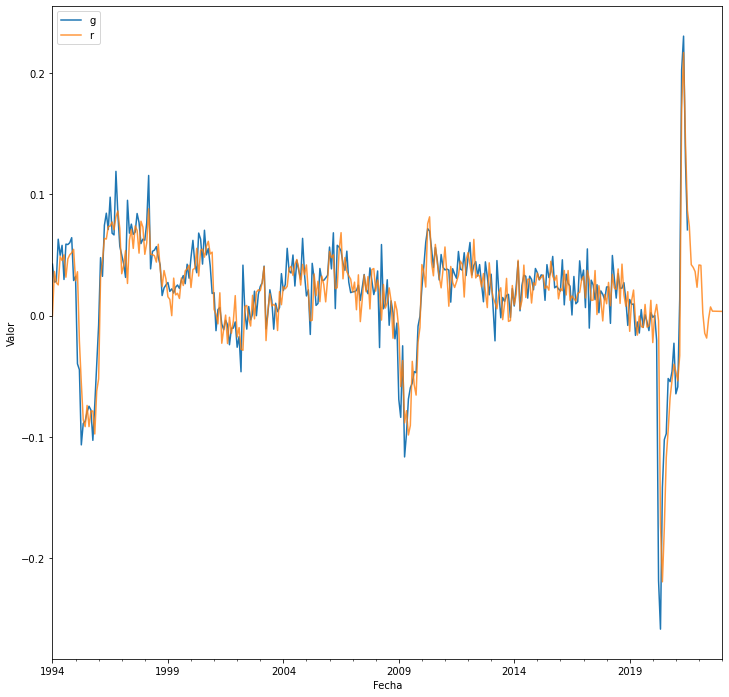

In [97]:
#establecemos parametros y usamos el metodo get_predict, para obtener nuestros resultados.
predict = sarima_model.get_prediction(start=pd.to_datetime('1994-01-01'), end=pd.to_datetime('2023-01-01'), dynamic=False)

predict_t = predict.conf_int() # se transforma el resulrado obtenido para poder graficar

#creamos la base de la grafica
ax = df_indicadores_transformed.plot(label = 'Observed', xlabel = 'Date', ylabel = 'Cambio Anual')

#realizamos el ploteo
predict.predicted_mean.plot(ax=ax, label="Predicción", alpha=0.8, figsize=(12,12))

#ponemos etiquetas a las labels
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')

plt.legend('graficas prediccion y valores reales')
plt.show()

En la grafica anterior, podemos ver la prediccion contra el valor real, en este caso, marcmos el valor de prediccion como naranja y volor azul como valores observados o reales del cambio anual.

In [98]:

#de nuevo llamamos a nuestro dataframe original y lo ordenamos de forma ascendente.
predict_data = data

predict_data = predict_data.sort_index(axis=0,ascending=False)

predict_data # se muestra el nuevo dataset

,Indicador,Nombre Indicador,Clave área geográfica,Entidad,Municipio,Periodo,Valor,Excepción,Unidad de medida,Frecuencia,Information Status,Referencias
355,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993-01-01,60.407691,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
354,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993-02-01,61.022521,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
353,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993-03-01,63.943249,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
352,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993-04-01,61.865984,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
351,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993-05-01,63.612900,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
...,...,...,...,...,...,...,...,...,...,...,...,...
5,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022-03-01,111.940152,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
4,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022-04-01,109.529866,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
3,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022-05-01,114.442424,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
2,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,0700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022-06-01,112.797501,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1


In [99]:
# realizamos prediccion de los datos originales
df_prediccion = pd.DataFrame(sarima_model.forecast(24))


#revertimos el logaritmo aplicado anteriormente a los datos.
df_prediccion = np.exp(df_prediccion).reset_index(drop=True)

#concatenamos y dataframes para hacer uno que contenga las predicciones.
df_prediccion['Valor'] = df_indicadores["Valor"].tail(50).reset_index(drop=True)
df_prediccion['Forecast'] = pd.DataFrame(df_prediccion['predicted_mean'] + df_prediccion['Valor'])


# se configura la variable periodo de acuerdo a las fechas del dataframe original YYYY-MM-DD
df_prediccion['Periodo'] = pd.date_range(start='2022-07-01', periods=24, freq='M')
df_prediccion['Periodo'] = pd.to_datetime(df_prediccion['Periodo']) 

df_prediccion # se muestra el resultado

,predicted_mean,Valor,Forecast,Periodo
0,1.076268,112.796383,113.872651,2022-07-31
1,1.042956,108.954460,109.997416,2022-08-31
2,1.040644,111.770062,112.810706,2022-09-30
3,1.037035,106.322342,107.359377,2022-10-31
4,1.023713,112.849234,113.872948,2022-11-30
5,1.042711,116.180677,117.223387,2022-12-31
6,1.042353,114.000995,115.043348,2023-01-31
7,1.002155,111.017452,112.019607,2023-02-28
8,0.985673,107.814054,108.799727,2023-03-31
9,0.981748,111.201253,112.183001,2023-04-30


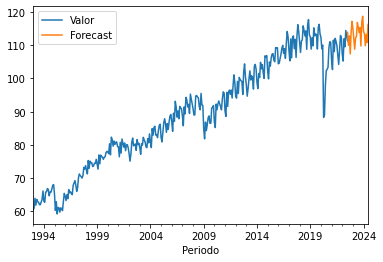

In [100]:
# se concatena el valor predecido y el original en una grafica.
ax = data.plot('Periodo','Valor')
df_prediccion.plot('Periodo','Forecast', ax=ax)